In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("data/stud.csv")

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no NULL values in the data

In [9]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
print("Categories in 'gender' variable:", end=" ")
print(df['gender'].unique())

print("Categories in 'race' variable:", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [23]:
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features {}'.format(len(numeric_features), numeric_features ))
print('We have {} categorical features {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
df['total_score'] = df['math_score'] +df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Total number of students who got full marks in Maths: {math_full}')
print(f'Total number of students who got full marks in Reading: {reading_full}')
print(f'Total number of students who got full marks in writing: {writing_full}')


Total number of students who got full marks in Maths: 7
Total number of students who got full marks in Reading: 17
Total number of students who got full marks in writing: 14


In [31]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Total number of students who got less than 20 marks in Maths: {math_less_20}')
print(f'Total number of students who got less than 20 marks in Reading: {reading_less_20}')
print(f'Total number of students who got less than 20 marks in writing: {writing_less_20}')

Total number of students who got less than 20 marks in Maths: 4
Total number of students who got less than 20 marks in Reading: 1
Total number of students who got less than 20 marks in writing: 3


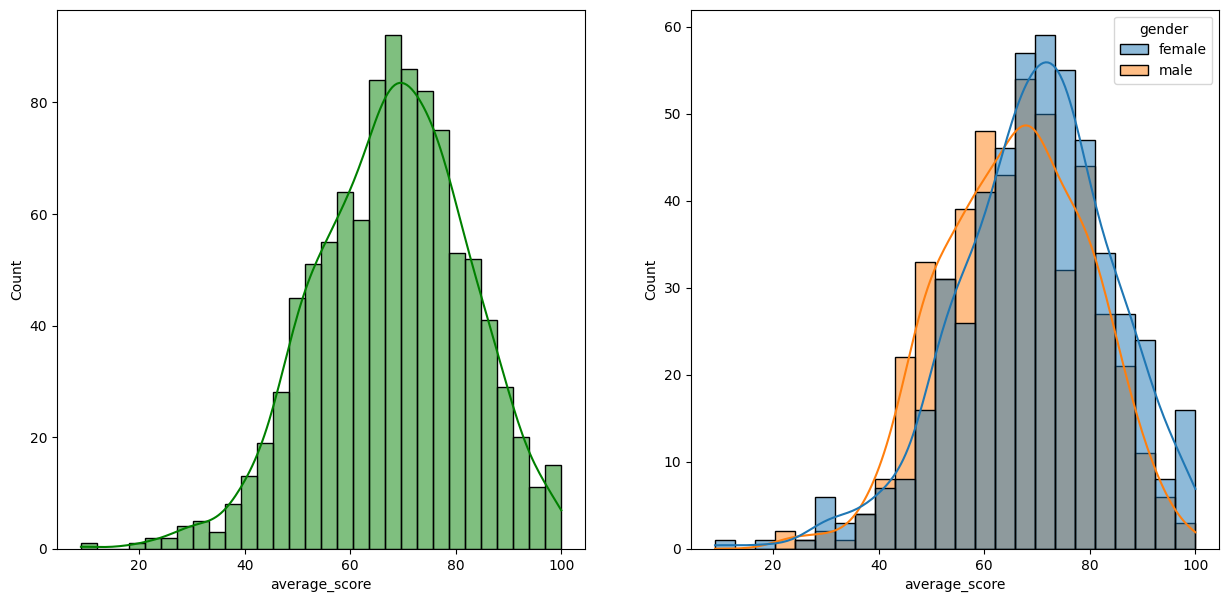

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'average_score', kde= True, hue= 'gender')
plt.show()

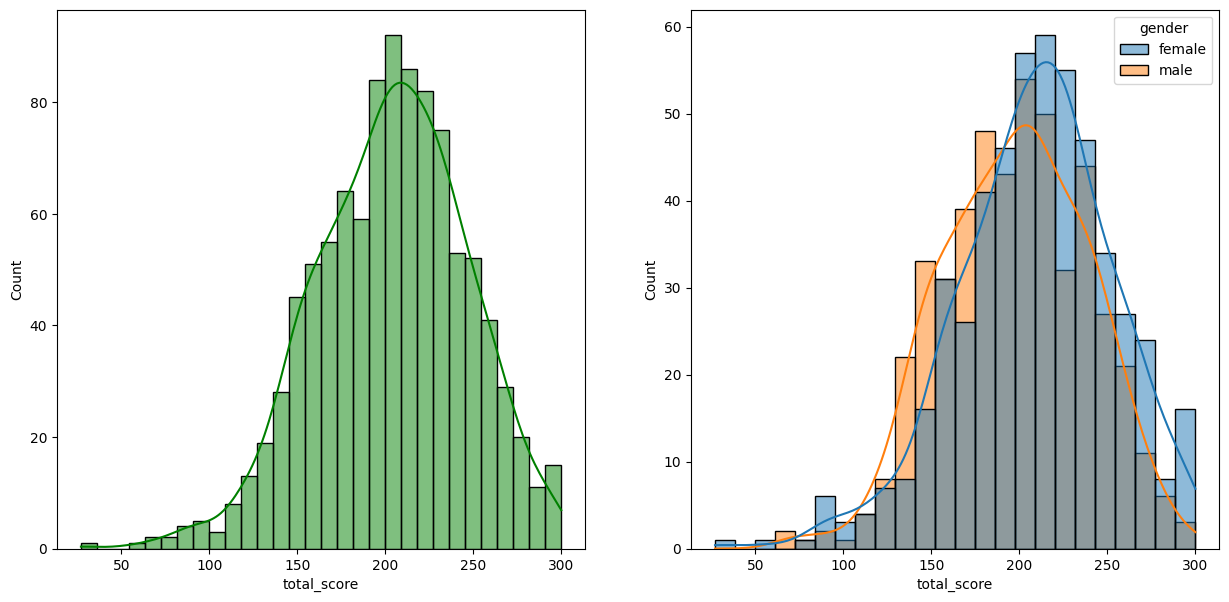

In [34]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'total_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x = 'total_score', kde= True, hue= 'gender')
plt.show()

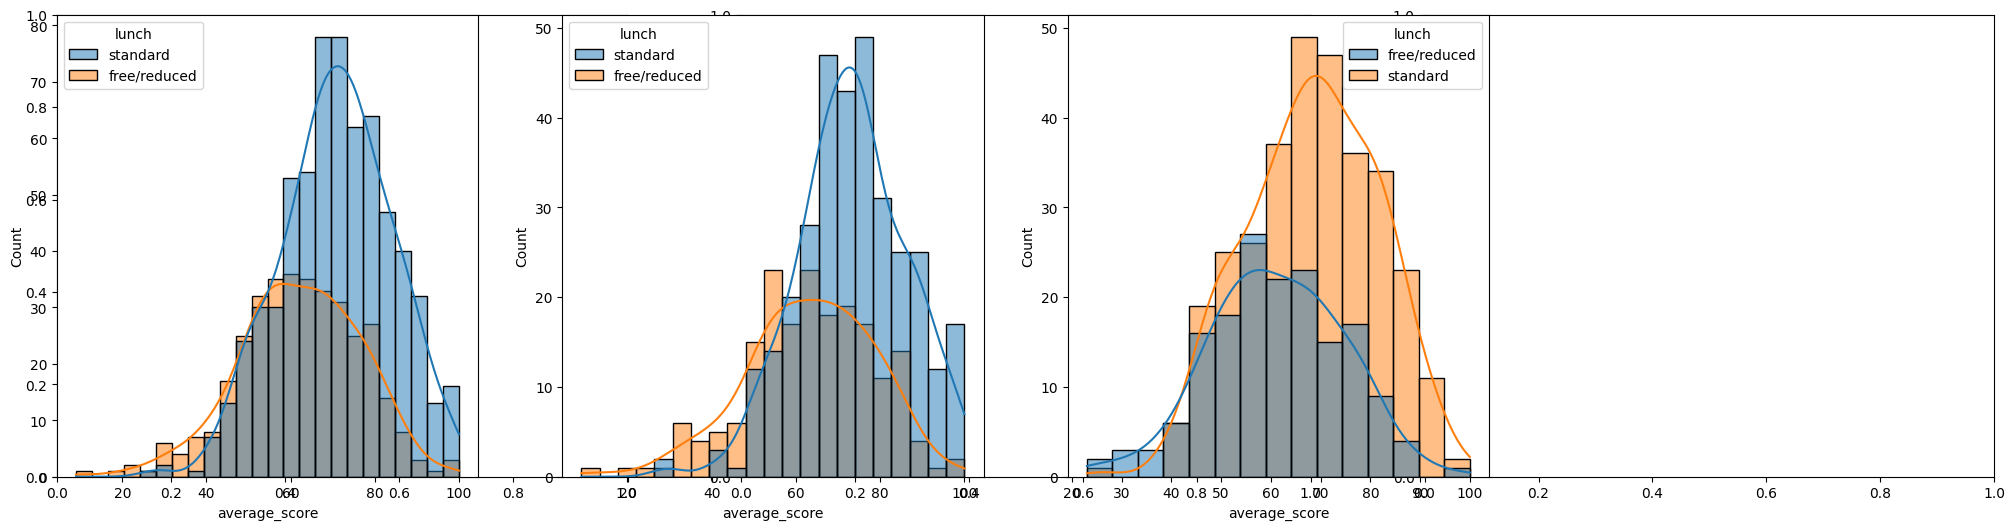

In [37]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(141)
sns.histplot(data= df, x = 'average_score', kde = True, hue ='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', kde = True, hue ='lunch')
plt.show()

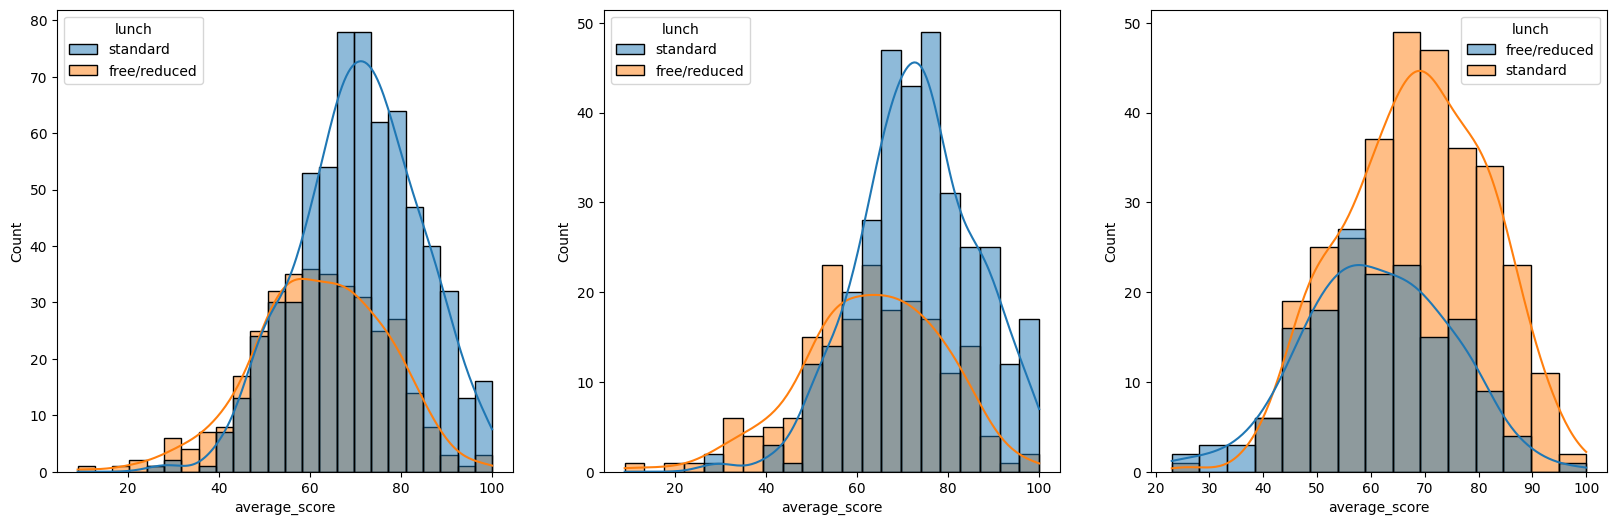

In [43]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

##### Insights
- Standard lunch helps students perform well in exams.
- This positive effect of standard lunch on exam performance is observed in both males and females.

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


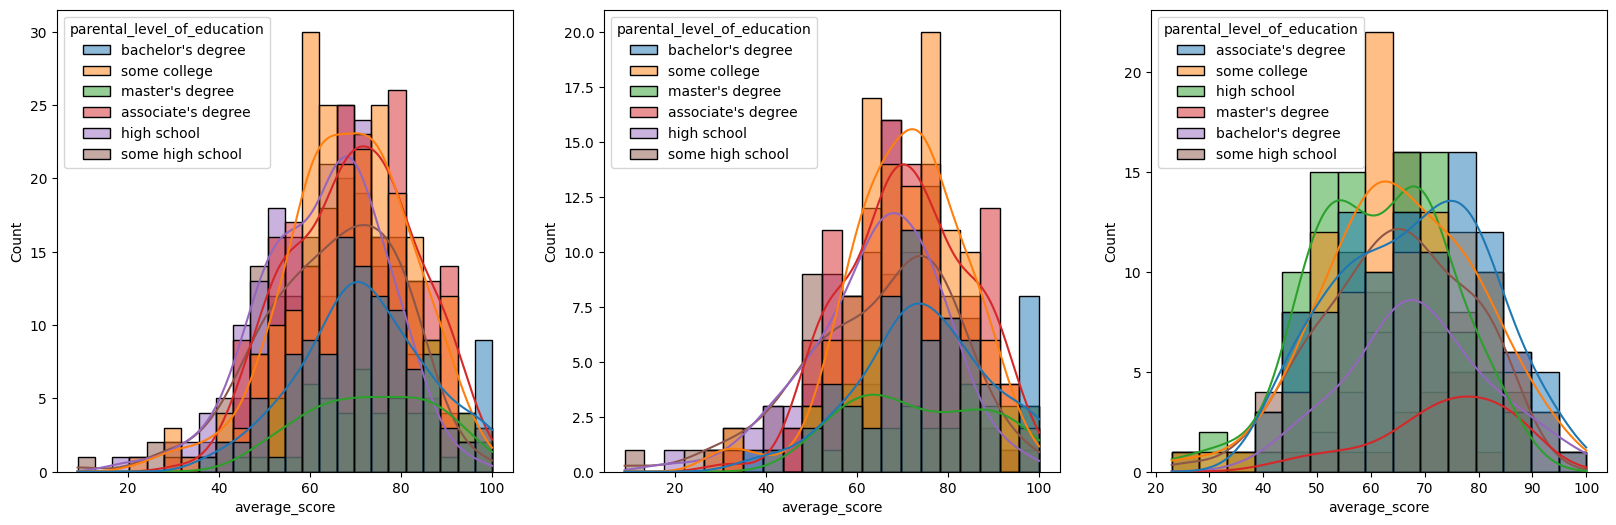

In [47]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

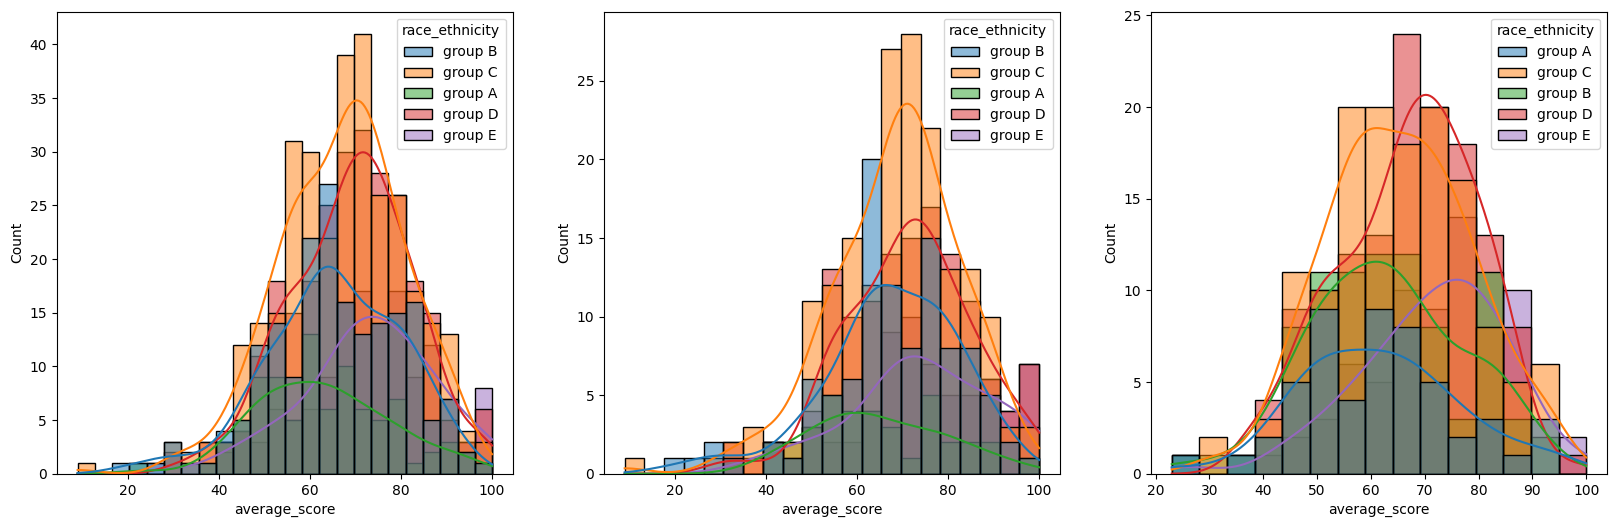

In [49]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

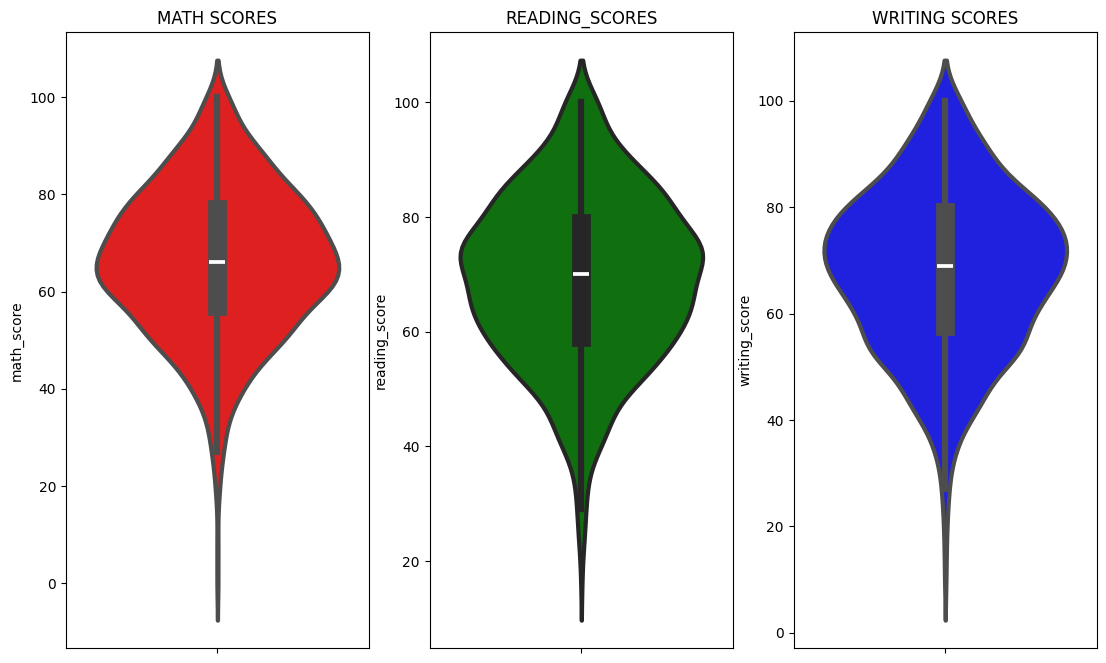

In [50]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING_SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

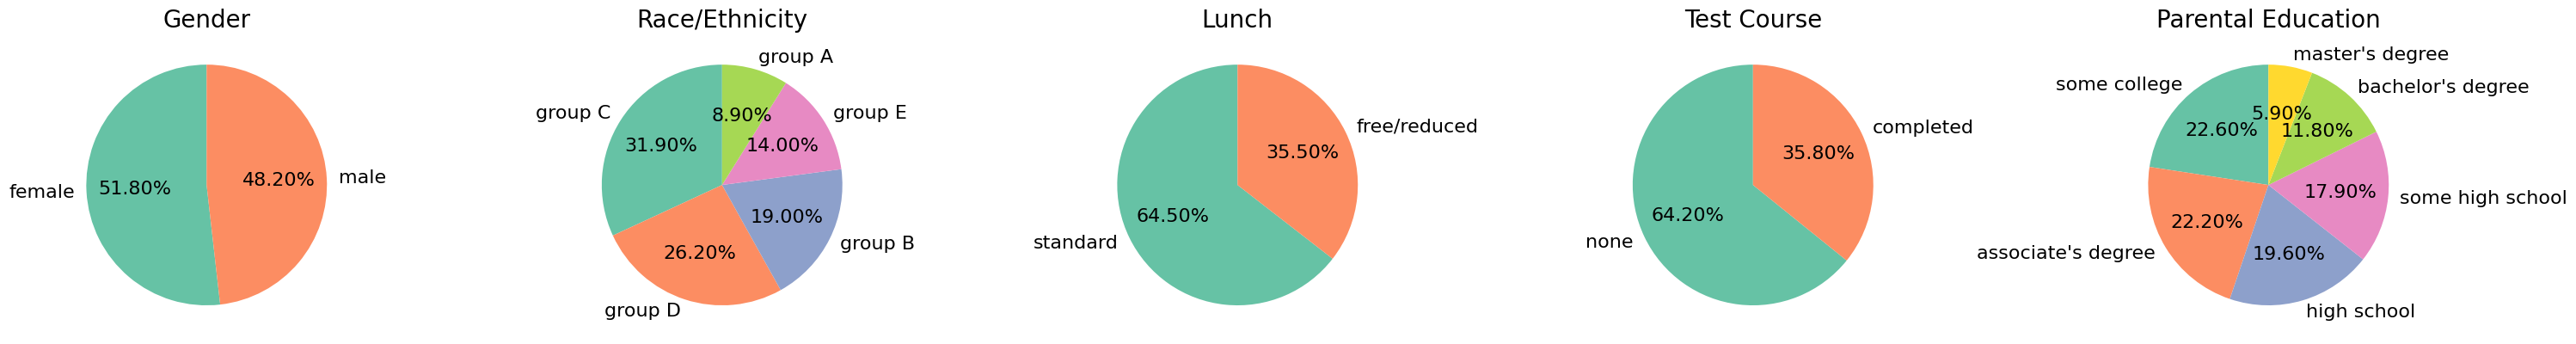

In [54]:
# Set figure size
plt.rcParams['figure.figsize'] = (30, 12)

# Define a color palette for up to 6 categories
palette = sns.color_palette('Set2', 6).as_hex()

# List of columns and subplot titles
plots = [
    ('gender', 'Gender'),
    ('race_ethnicity', 'Race/Ethnicity'),
    ('lunch', 'Lunch'),
    ('test_preparation_course', 'Test Course'),
    ('parental_level_of_education', 'Parental Education')
]

for i, (col, title) in enumerate(plots, 1):
    plt.subplot(1, 5, i)
    size = df[col].value_counts()
    labels = size.index
    colors = palette[:len(labels)]
    plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, textprops={'fontsize':16})
    plt.title(title, fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

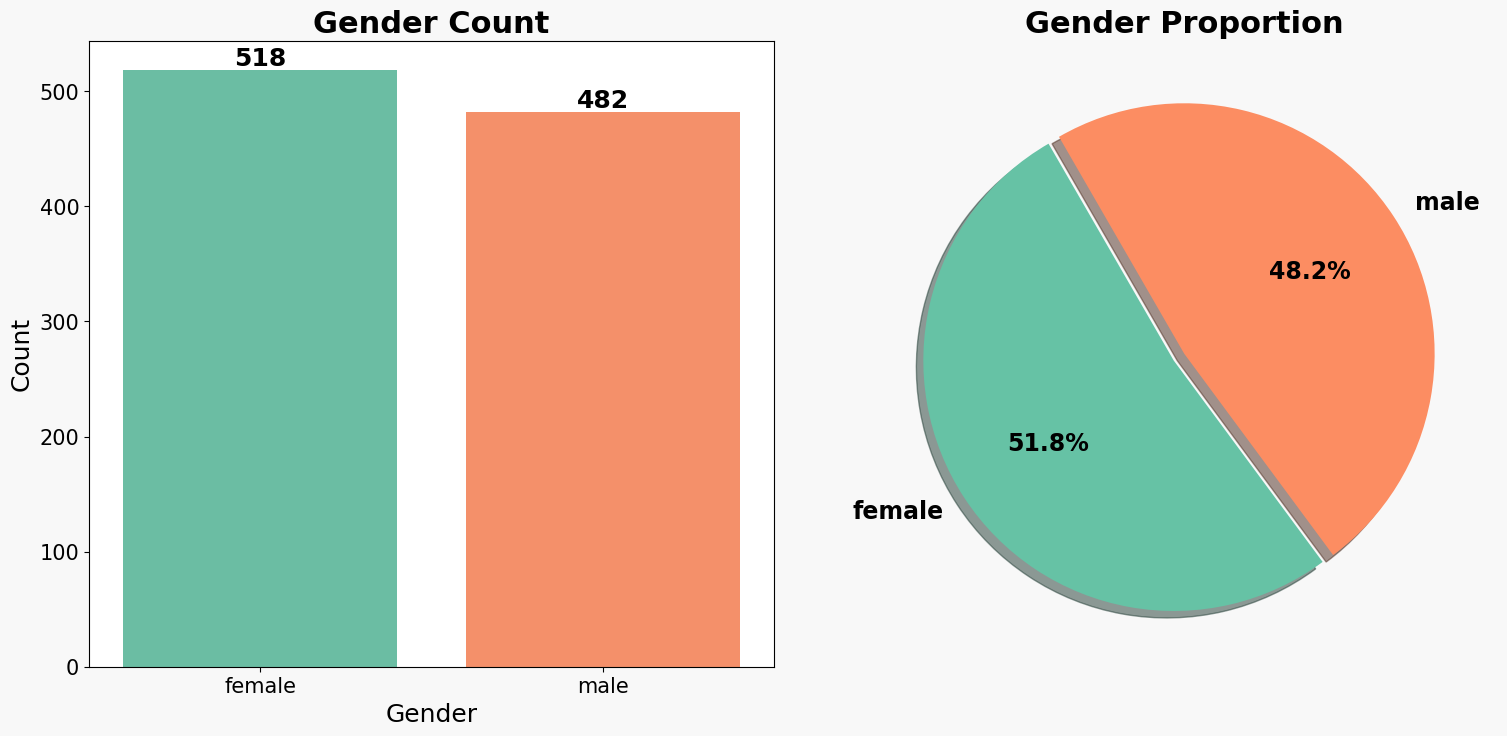

In [57]:
palette = sns.color_palette('Set2', 2).as_hex()


counts = df['gender'].value_counts()
labels = counts.index


fig, ax = plt.subplots(1, 2, figsize=(16, 8), facecolor="#f8f8f8")


sns.countplot(x='gender', data=df, ax=ax[0], palette=palette, saturation=0.9)
ax[0].set_title('Gender Count', fontsize=22, fontweight='bold')
ax[0].set_xlabel('Gender', fontsize=18)
ax[0].set_ylabel('Count', fontsize=18)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=18, fontweight='bold')
ax[0].tick_params(labelsize=15)


explode = [0.05 if i == counts.idxmax() else 0 for i in counts.index]  
ax[1].pie(
    x=counts,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=120,
    colors=palette,
    textprops={'fontsize': 17, 'fontweight': 'bold'}
)
ax[1].set_title('Gender Proportion', fontsize=22, fontweight='bold')
ax[1].set_aspect('equal')  

plt.tight_layout(pad=3)
plt.show()

In [59]:
# Works perfectly and avoids the error
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
gender_group = df.groupby('gender')[numeric_cols].mean()
print(gender_group)

        math_score  reading_score  writing_score  total_score  average_score
gender                                                                      
female   63.633205      72.608108      72.467181   208.708494      69.569498
male     68.728216      65.473029      63.311203   197.512448      65.837483


In [61]:
gender_average = df.groupby('gender')['average_score'].mean()
gender_average

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

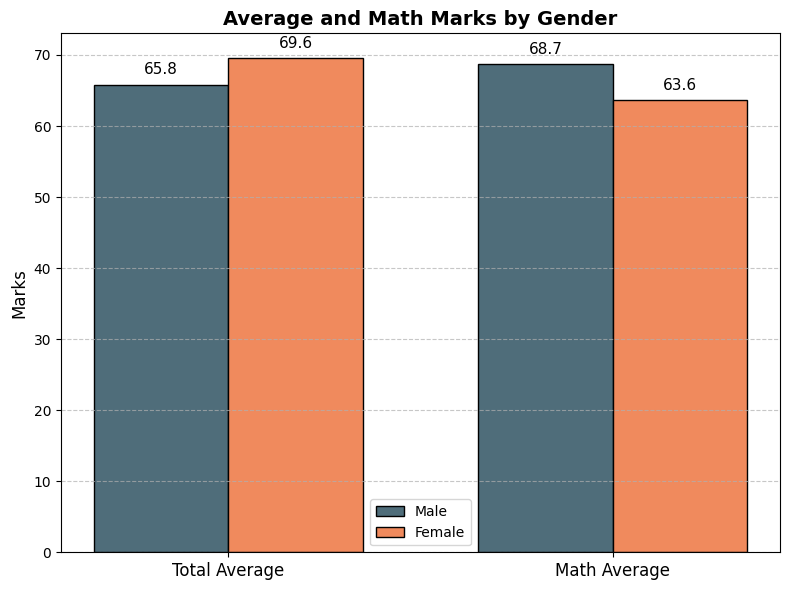

In [67]:

labels = ['Total Average', 'Math Average']
female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 6))

male_color = '#4F6D7A'   
female_color = '#F08A5D'  

bars1 = plt.bar(x - width/2, male_scores, width, label='Male', color=male_color, edgecolor='black')
bars2 = plt.bar(x + width/2, female_scores, width, label='Female', color=female_color, edgecolor='black')

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Marks", fontsize=12)
plt.title("Average and Math Marks by Gender", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()



### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

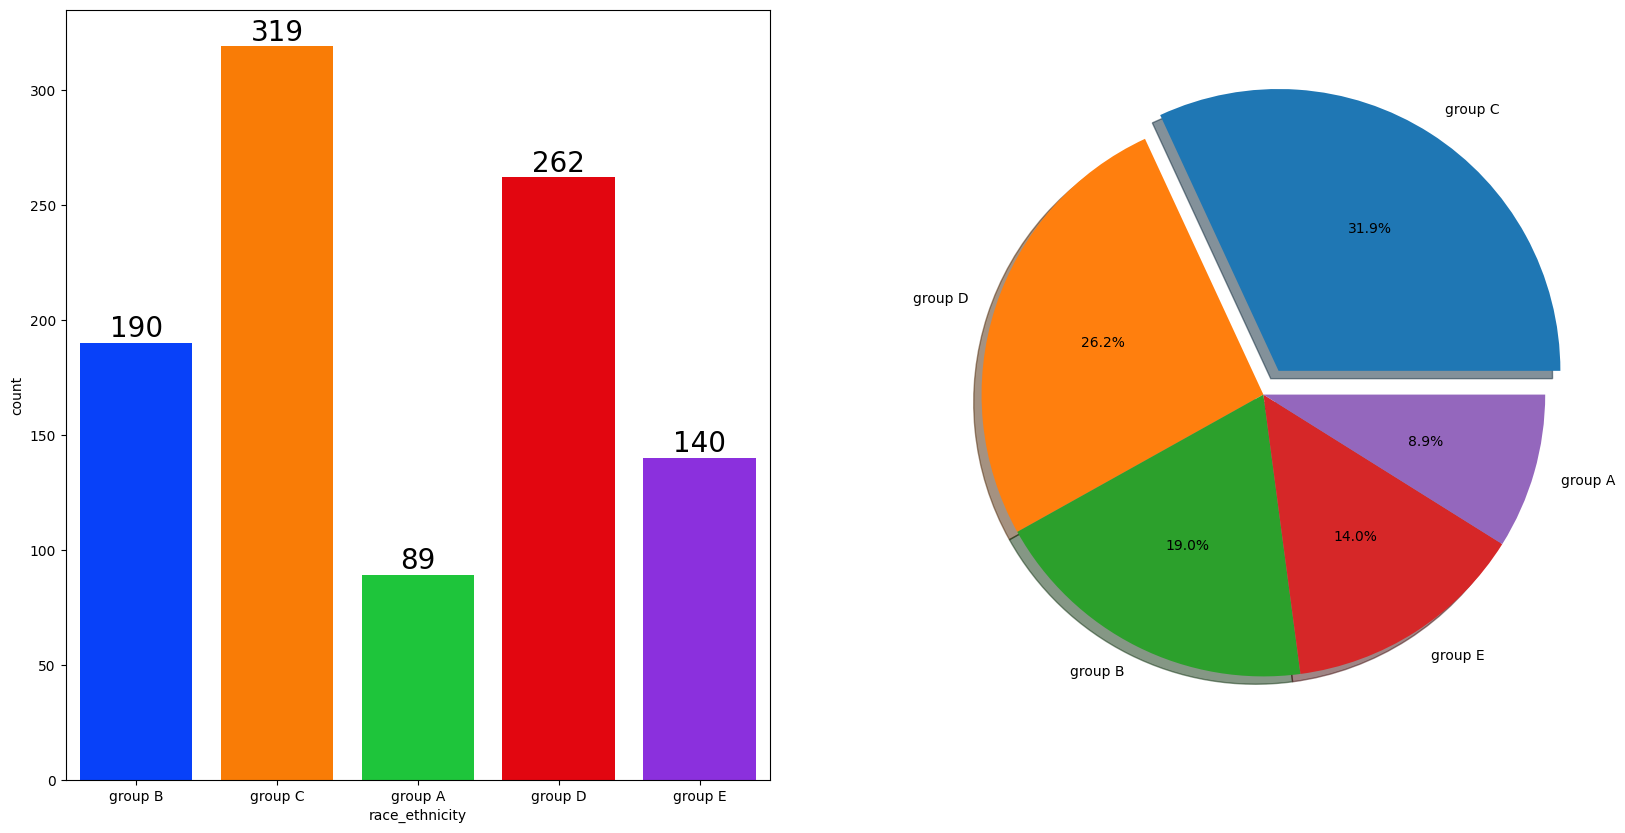

In [72]:
f, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x= df['race_ethnicity'], data = df, palette='bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = '20')

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

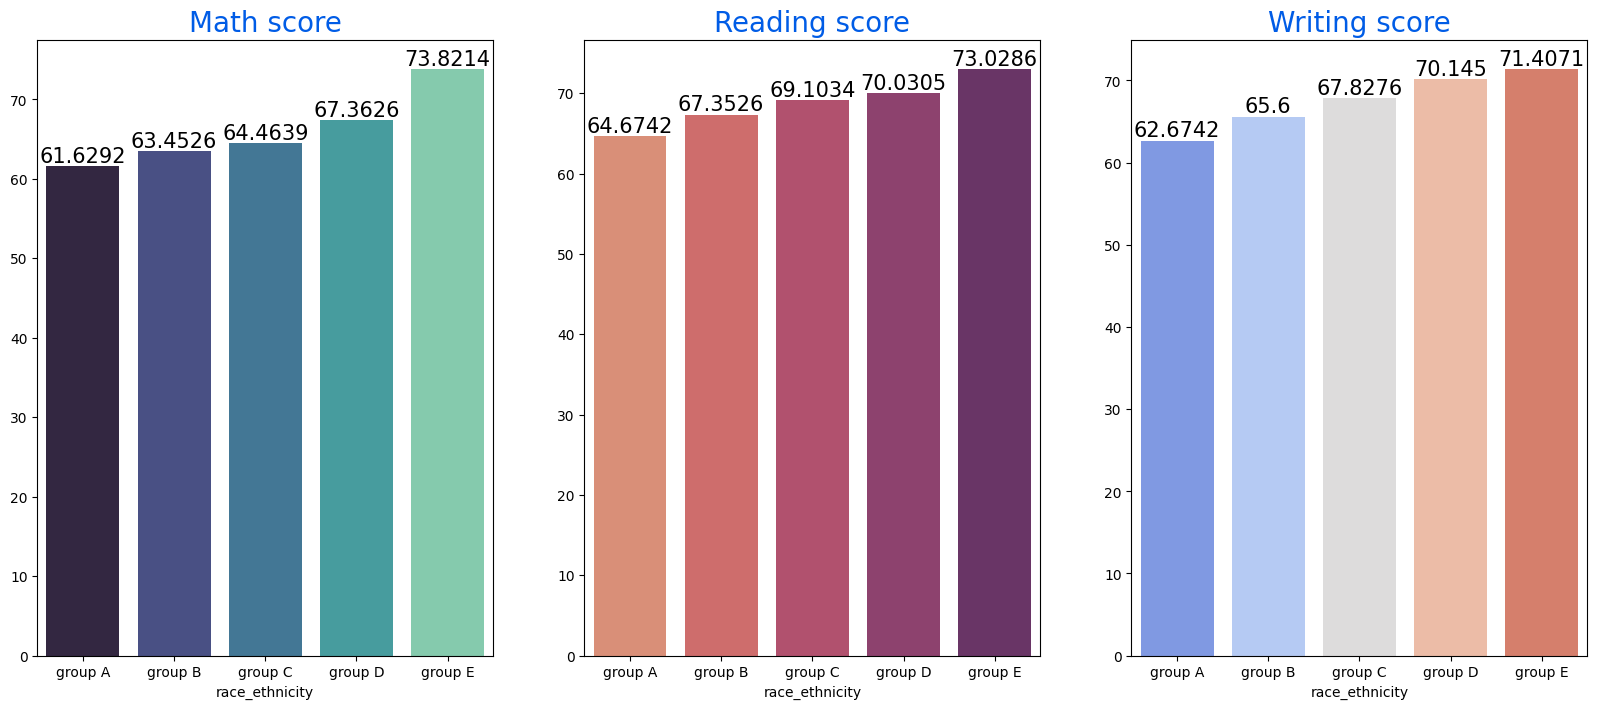

In [73]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

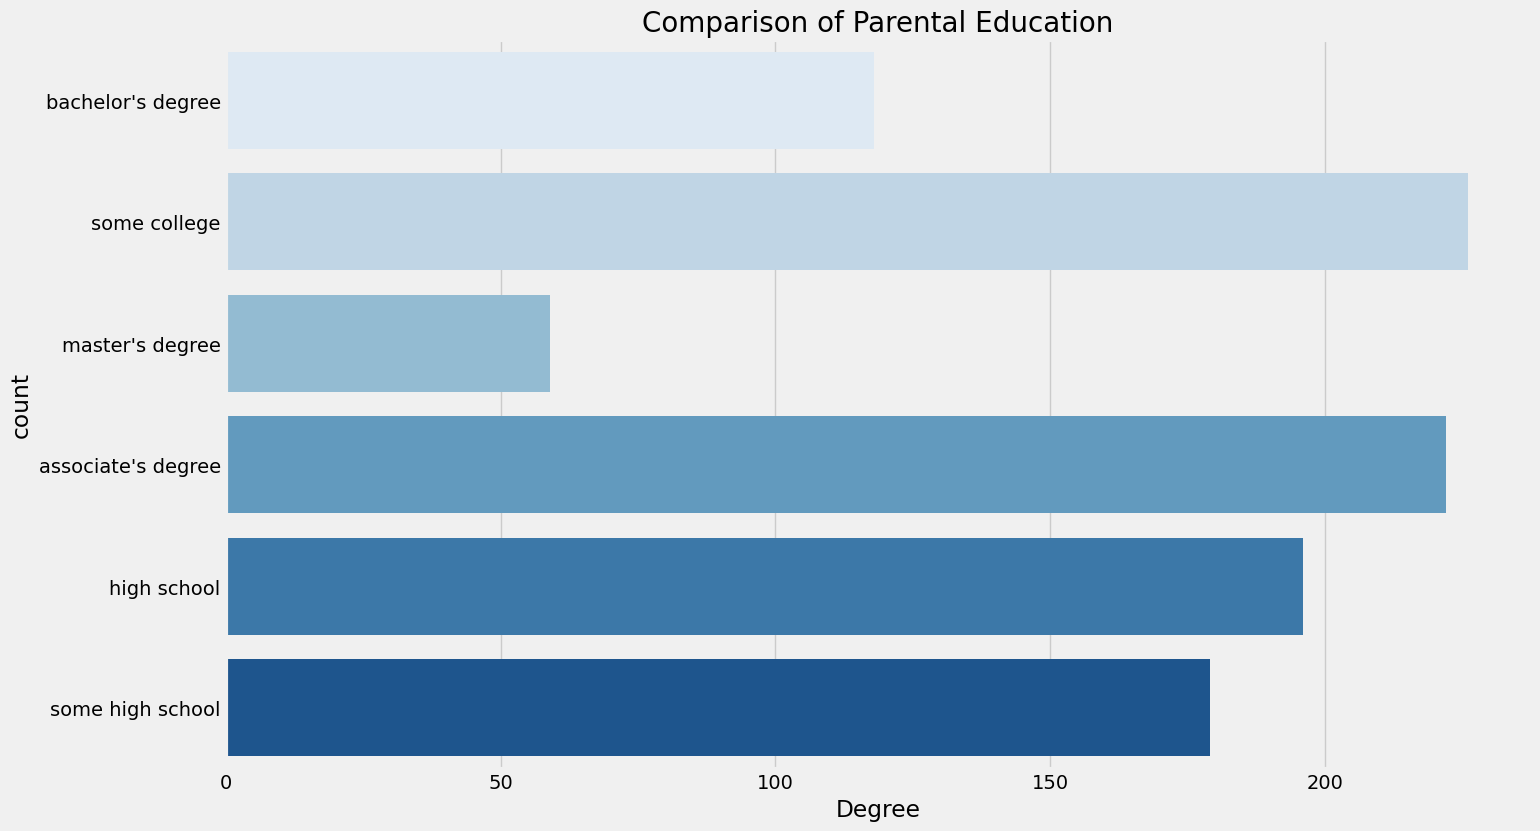

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

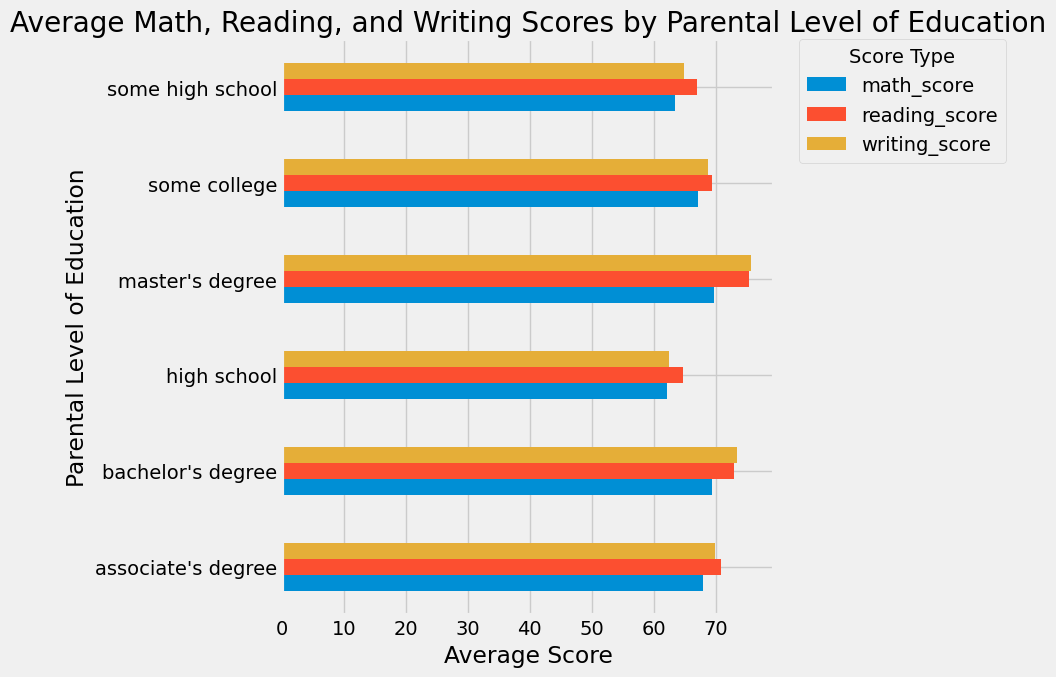

In [79]:
# Only select relevant columns
score_cols = ['math_score', 'reading_score', 'writing_score']

# Group by and plot the means for these columns
df.groupby('parental_level_of_education')[score_cols].mean().plot(kind='barh', figsize=(10, 7))

plt.xlabel('Average Score')
plt.ylabel('Parental Level of Education')
plt.title('Average Math, Reading, and Writing Scores by Parental Level of Education')
plt.legend(title='Score Type', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

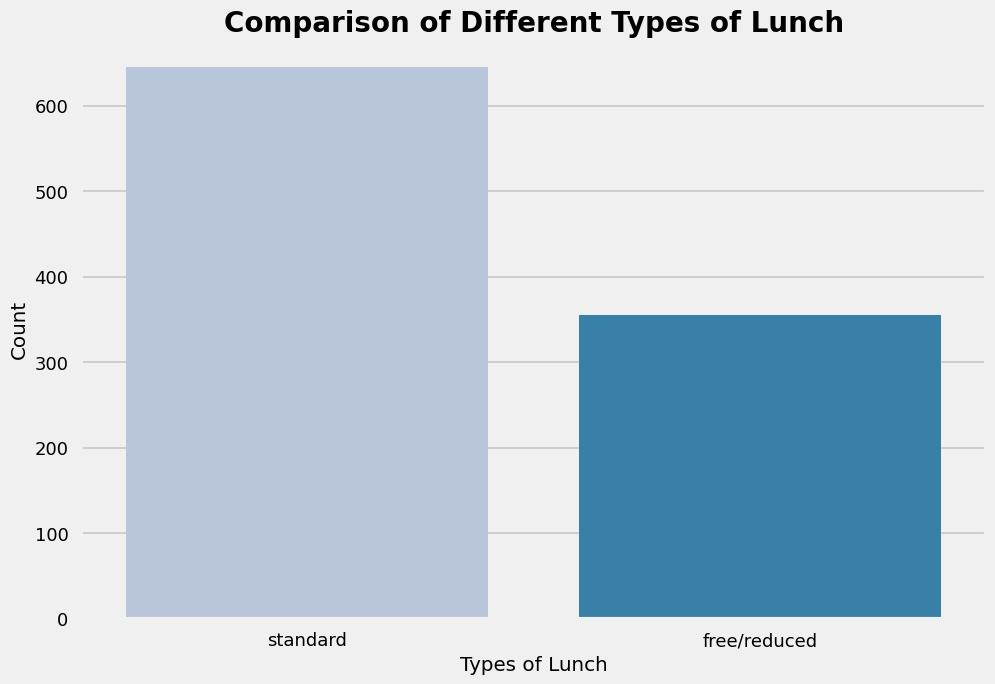

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk') 

# Correct usage of countplot with x argument and fontweight
sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

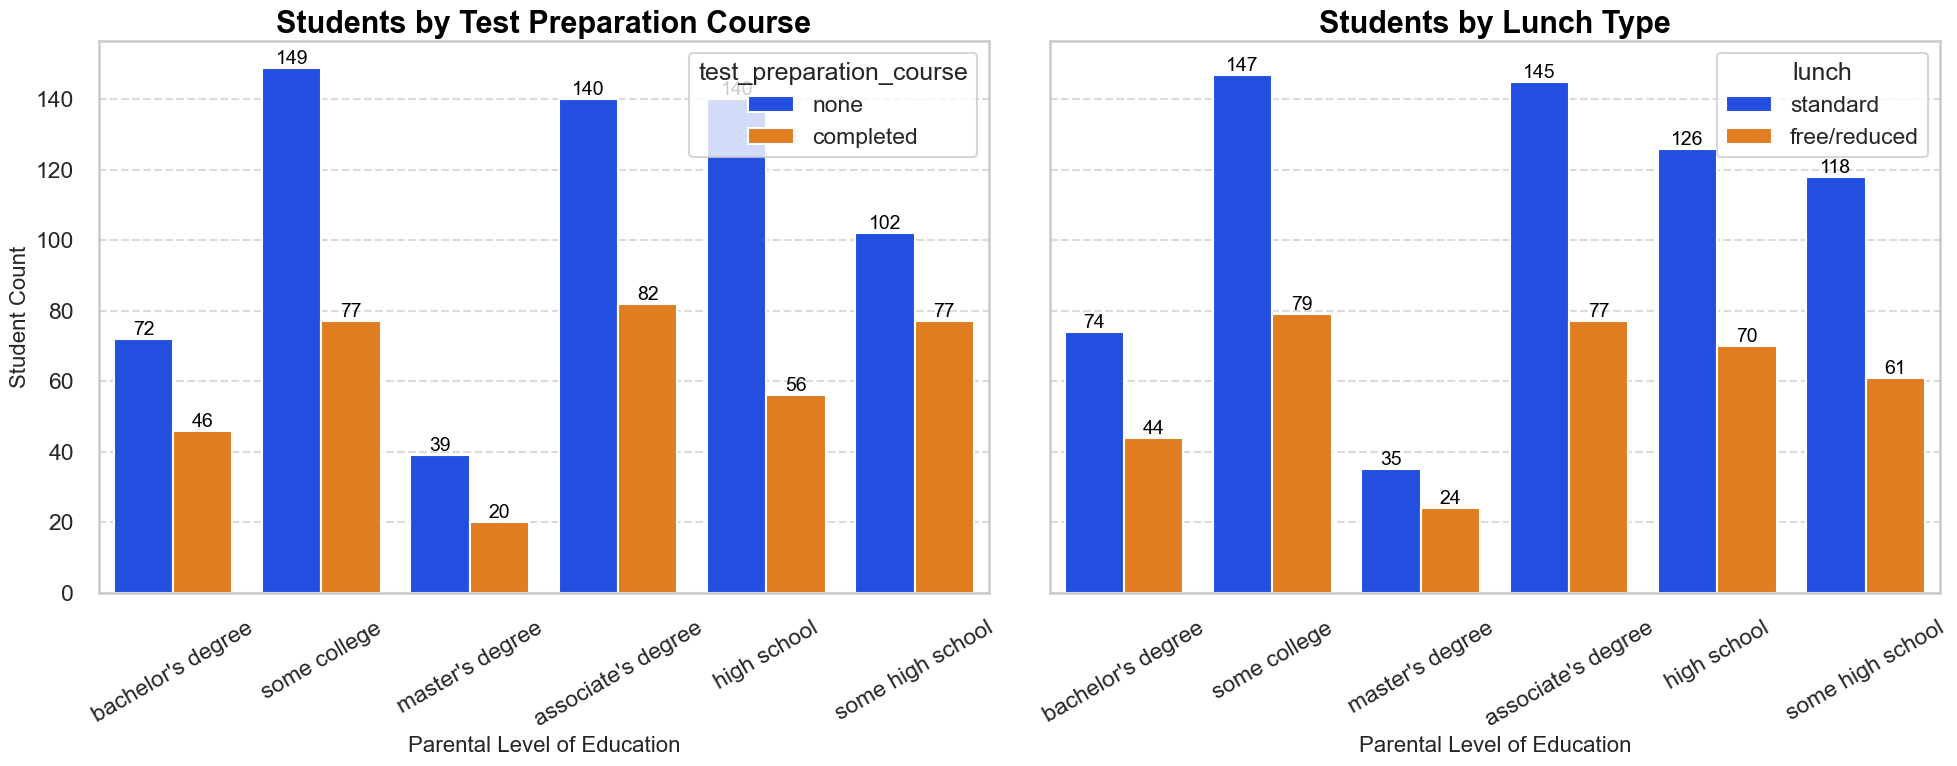

In [90]:
# Set overall style
sns.set_theme(context='talk', style='whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot 1: Parental education vs Test Preparation Course
sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='test_preparation_course',
    ax=ax[0]
)
ax[0].set_title('Students by Test Preparation Course', color='black', fontsize=22, fontweight='bold')
ax[0].set_xlabel('Parental Level of Education', fontsize=16)
ax[0].set_ylabel('Student Count', fontsize=16)
ax[0].tick_params(axis='x', rotation=30)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# Plot 2: Parental education vs Lunch Type
sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='lunch',
    ax=ax[1]
)
ax[1].set_title('Students by Lunch Type', color='black', fontsize=22, fontweight='bold')
ax[1].set_xlabel('Parental Level of Education', fontsize=16)
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', rotation=30)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=14)

plt.tight_layout()
plt.show()

### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

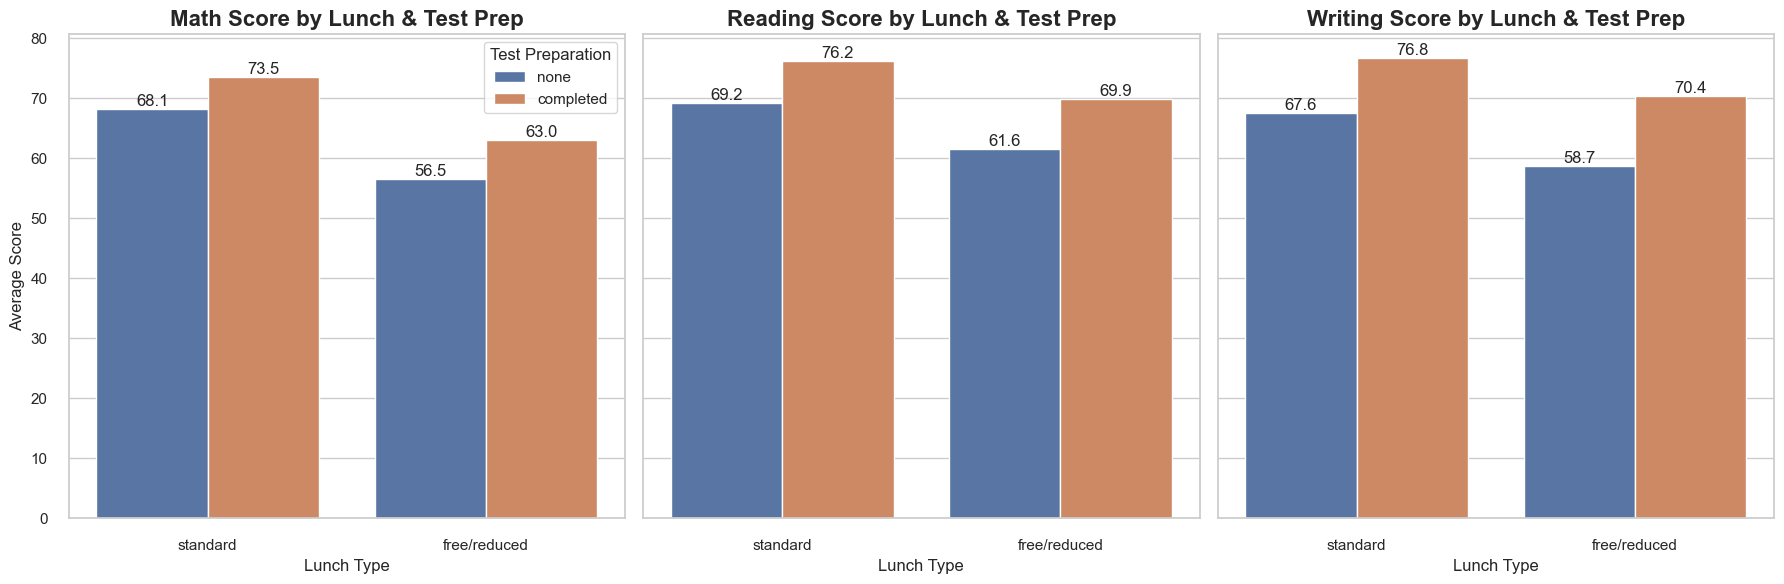

In [94]:
sns.set_theme(context='notebook', style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

score_cols = ['math_score', 'reading_score', 'writing_score']
titles = ['Math Score by Lunch & Test Prep', 'Reading Score by Lunch & Test Prep', 'Writing Score by Lunch & Test Prep']

for i, col in enumerate(score_cols):
    ax = axes[i]
    barplot = sns.barplot(
        x='lunch',
        y=col,
        hue='test_preparation_course',
        data=df,
        ax=ax,
        palette='deep',
        ci=None
    )
    ax.set_title(titles[i], fontsize=16, fontweight='bold')
    ax.set_xlabel('Lunch Type')
    ax.set_ylabel('' if i != 0 else 'Average Score')

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=12)

# Remove duplicate legends
axes[1].get_legend().remove()
axes[2].get_legend().remove()
axes[0].legend(title='Test Preparation', loc='upper right')

plt.tight_layout()
plt.show()

### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

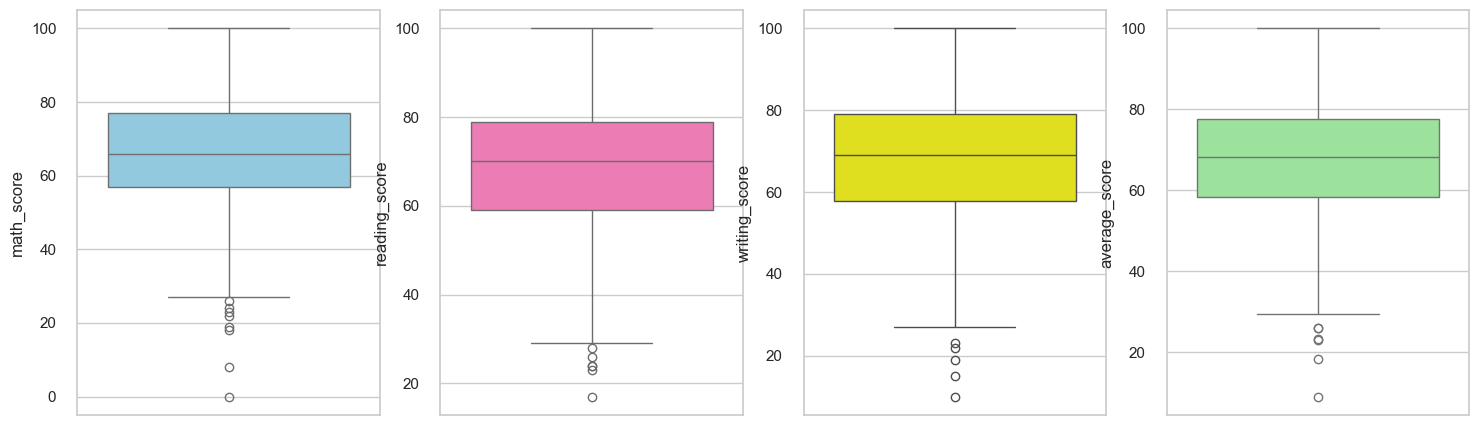

In [97]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

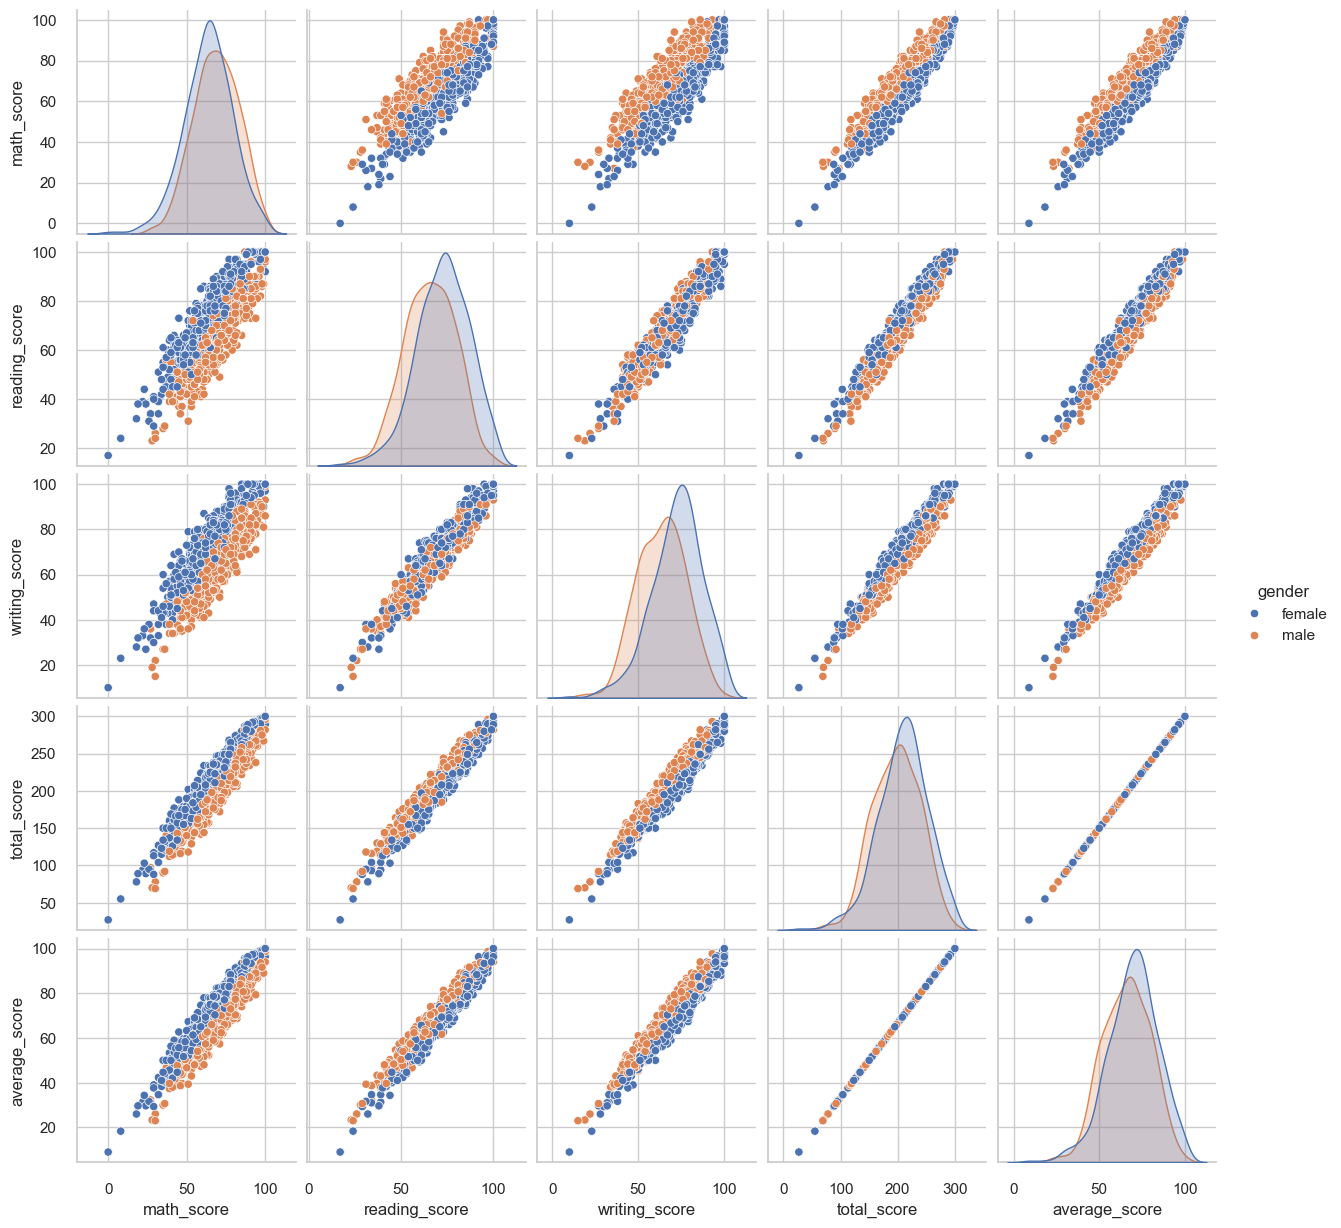

In [98]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

#### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.